In [4]:
import pickle
import sys, os
sys.path.append("/Users/chilpert/Work/pyproteinsExt/src")
sys.path.append("/Users/chilpert/Work/pyproteins/src")
import pyproteinsExt 
import pyproteins
import time
from igraph import *

In [2]:
def save(data, tag=None):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fTag = "NOX_annotation_" + tag + "_" if tag else "NOX_annotation_"
    fSerialDump = fTag + timestr + ".pickle"
    with open(saveDir + '/' + fSerialDump, 'wb') as f:
        pickle.dump(data, f)
    print('data structure saved to', saveDir + '/' + fSerialDump)

def load(fileName):
    saveDir="/Volumes/arwen/mobi/group/NOX_CH/pickle_saved"
    d = pickle.load( open(saveDir + "/" + fileName, "rb" ) )
    print("restore a annotated container of ", len(d), "elements")
    return d

In [3]:
data=load("NOX_annotation_withNeighborhood_20190509-141816.pickle")

restore a annotated container of  785 elements


### Create edges dictionnary

In [8]:
dic_edges={}
all_domains=set()
core_domains={"Ferric_reduct","FAD_binding_8","FAD_binding_6","NAD_binding_6","NAD_binding_1"}
for p in data: 
    domains=set(list(data[p]['hmmr'].keys()))
    for cd in core_domains: 
        domains.discard(cd)
    related_domains=domains.copy()
    for d in domains:
        related_domains.remove(d)
        all_domains.add(d)
        for d2 in related_domains : 
            edge=tuple(sorted((d,d2)))
            if edge not in dic_edges: 
                dic_edges[edge]=0
            dic_edges[edge]+=1  

In [9]:
dic_nb_domain={}
for p in data : 
    for d in data[p]['hmmr']:
        if d not in core_domains: 
            if d not in dic_nb_domain :
                dic_nb_domain[d]=0 
            dic_nb_domain[d]+=1   

In [10]:
list_edges=[]
list_weight=[]
for e in dic_edges: 
    list_edges.append(e)
    list_weight.append(dic_edges[e])

In [11]:
g=Graph()
g.add_vertices(len(all_domains))
g.vs["name"]=list(all_domains)
g.vs["label"]=g.vs["name"]
g.add_edges(list_edges)
g.es["weight"]=list_weight
g.es["label"]=g.es["weight"]
list_vertex_weigth=[]
for vertex in g.vs["name"] : 
    list_vertex_weigth.append(dic_nb_domain[vertex])
g.vs["weight"]=list_vertex_weigth    

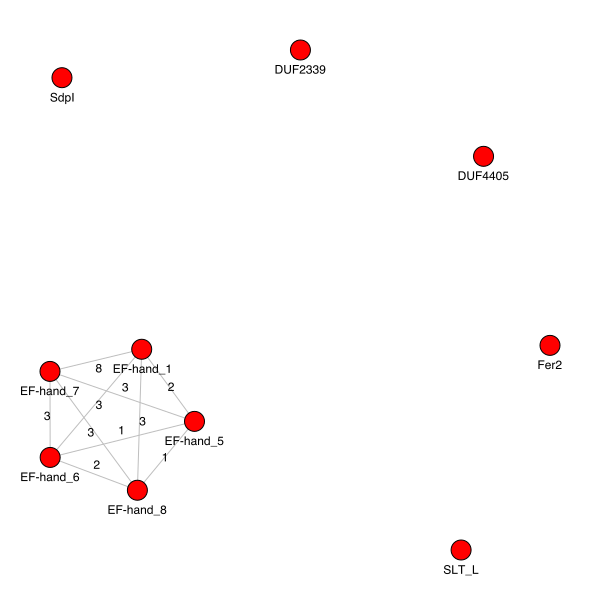

In [12]:
plot(g,vertex_label_dist=1.5,vertex_label_size=12,edge_label_dist=0,edge_color="grey",target="/Users/chilpert/Work/NOX_visu/graph_domains.pdf",margin=50)

In [13]:
connected_comp=g.clusters()

In [19]:
nb_cc=0
components_dir="/Volumes/arwen/mobi/group/NOX_CH/Domain/components"
global_output="/Volumes/arwen/mobi/group/NOX_CH/Domain/domain_components.tsv"
go=open(global_output,"w")
go.write("#Component\tDomains\tMean_occurence\t")
for cc in connected_comp.subgraphs(): 
    if len(cc.vs["name"])>1: 
        nb_cc+=1
        list_percent=[]
        print("== COMP",nb_cc)
        print()
        o=open(components_dir+"/comp"+str(nb_cc)+".tsv","w")
        o.write("#Domain1\tDomain2\tpercent_coocurrence\n")
        for vertex in cc.vs: 
            for n in vertex.neighbors():
                edge=[e for e in cc.es if e.source==vertex.index and e.target==n.index]
                if not edge: 
                    edge=[e for e in cc.es if e.source==n.index and e.target==vertex.index]
                edge=edge[0]    
                percent_coocur=edge["weight"]/vertex["weight"]*100
                list_percent.append(percent_coocur)
                print(vertex["name"],"cooccurs",percent_coocur,"% with",n["name"])
                o.write(vertex["name"]+"\t"+n["name"]+"\t"+str(percent_coocur)+"\n")
            print() 
        o.close()    
        mean_cooccur=mean(list_percent)
        go.write(str(nb_cc)+"\t"+",".join(cc.vs["name"])+"\t"+str(mean_cooccur)+"\")
global_output.close()        

== COMP 1

EF-hand_1 cooccurs 37.5 % with EF-hand_6
EF-hand_1 cooccurs 37.5 % with EF-hand_8
EF-hand_1 cooccurs 100.0 % with EF-hand_7
EF-hand_1 cooccurs 25.0 % with EF-hand_5

EF-hand_6 cooccurs 100.0 % with EF-hand_1
EF-hand_6 cooccurs 66.66666666666666 % with EF-hand_8
EF-hand_6 cooccurs 100.0 % with EF-hand_7
EF-hand_6 cooccurs 33.33333333333333 % with EF-hand_5

EF-hand_8 cooccurs 100.0 % with EF-hand_1
EF-hand_8 cooccurs 66.66666666666666 % with EF-hand_6
EF-hand_8 cooccurs 100.0 % with EF-hand_7
EF-hand_8 cooccurs 33.33333333333333 % with EF-hand_5

EF-hand_7 cooccurs 80.0 % with EF-hand_1
EF-hand_7 cooccurs 30.0 % with EF-hand_6
EF-hand_7 cooccurs 30.0 % with EF-hand_8
EF-hand_7 cooccurs 30.0 % with EF-hand_5

EF-hand_5 cooccurs 66.66666666666666 % with EF-hand_1
EF-hand_5 cooccurs 33.33333333333333 % with EF-hand_6
EF-hand_5 cooccurs 33.33333333333333 % with EF-hand_8
EF-hand_5 cooccurs 100.0 % with EF-hand_7

60.166666666666664
